# Analysis of Nonlinear Systems

If the angular displacement of the pendulum is greater than $\pi/12$ radians, then the small angle approximation is no longer valid, and the equation for the angular acceleration is nonlinear.

## 12.1 The difference between linear and nonlinear systems

In general, linear superposition does not hold for nonlinear ordinary differential equations.

1. Given a particular initial condition, what will be the long-term (steady-state) behavior of the system?
2. What are all the possible long-term (steady-state) behaviors of the system for a given collection of initial conditions?
3. What equilibria exist within the system, and what is their stability?
4. How far in the future are the predictions made by the model reliable?

In physics, equations of motion are normally found using Newton's second law, the Euler-Lagrange equation, Hamilton's equations of motion, or other methods.

## 12.2 Phase portraints

### Example 12.1: Damped Hamonic Oscillator-revisited

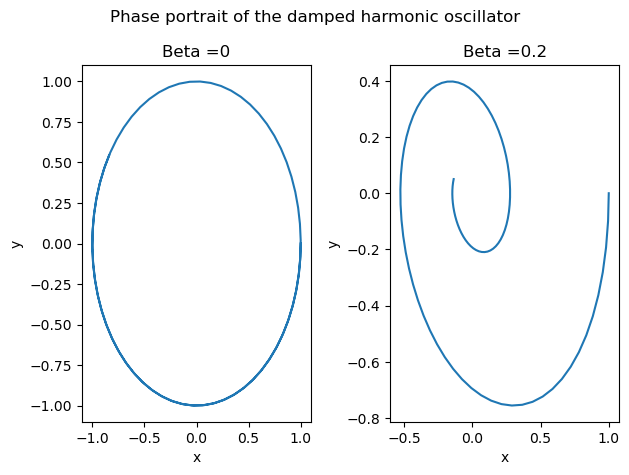

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def dho(y, t, beta, omega):
    x, v = y
    dydt = [v, -2*beta*v - omega*x]
    return dydt

y0 = [1, 0]
t = np.linspace(0, 10, 100)
sol0 = odeint(dho, y0, t, args=(0,1))
sol0_2 = odeint(dho, y0, t, args=(0.2, 1))

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].plot(sol0[:,0], sol0[:,1])
ax[0].set_title('Beta =0')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].plot(sol0_2[:,0], sol0_2[:,1])
ax[1].set_title('Beta =0.2')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
fig.suptitle('Phase portrait of the damped harmonic oscillator')
fig.tight_layout()
plt.show()

## 12.3 Fixed points and equilibria

### Example 12.2: Predator-prey models

In [5]:
from sympy import solve
from sympy.abc import H, P, r, m, a, b

fps =solve((r*H-a*H*P,-m*P+b*H*P),(H,P))
print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('The fixedpointsare: ', fps)

---------------------------- CODE OUTPUT ----------------------------- 

The fixedpointsare:  [(0, 0), (m/b, r/a)]


### 12.3.2 The classsification of fixed points

### Example 12.3: Stability of the damped harmonic oscillator

In [7]:
from sympy import diff, Matrix, symbols
x, v, beta, omega = symbols('x, v, beta, omega')
f = v
g = -beta * v- omega ** 2 * x
A =Matrix([[diff(f,x),diff(f,v)],[diff(g,x),diff(g,v)]])\
.subs([(x,0),(v,0)])

print('The eigenvalues with beta = 0 are:')
print(A.subs([(beta,0),(omega,1)]).eigenvals())

print('\nThe eigenvalueswithbeta=0.2are:')
print((A.subs([(beta,0.2),(omega,1)])).eigenvals())

The eigenvalues with beta = 0 are:
{-I: 1, I: 1}

The eigenvalueswithbeta=0.2are:
{-0.1 - 0.99498743710662*I: 1, -0.1 + 0.99498743710662*I: 1}


### Example 12.4: Stability and the Lotka-Volterra equations

In [10]:
from sympy import diff,Matrix,symbols,solve
r, a,m,b,H,P=symbols('r, a,m,b,H,P')
f =r*H-a*H*P
g =-m*P+b*H*P

fps_1 =[0,0]
fps_2 =[m/b,r/a]
A_1 =Matrix([[diff(f,H),diff(f,P)],[diff(g,H),diff(g,P)]])\
.subs([(H,fps_1[0]),(P,fps_1[1])])
A_2 =Matrix([[diff(f,H),diff(f,P)],[diff(g,H),diff(g,P)]])\
.subs([(H,fps_2[0]),(P,fps_2[1])])

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('The eigenvalues of the origin are:')
print(A_1.eigenvals())
print('\nThe eigenvalues of (m/b,r/a) are:')
print(A_2.eigenvals())

---------------------------- CODE OUTPUT ----------------------------- 

The eigenvalues of the origin are:
{r: 1, -m: 1}

The eigenvalues of (m/b,r/a) are:
{-sqrt(-m*r): 1, sqrt(-m*r): 1}


## 12.4 Bifurcations of fixed points

Understanding the potential bifurcations in a dynamical system is of the utmost importance. As parameters change value, a once-stable nad desirable equilibrium state may become unstable.

### Example 12.5: SIS model of disease in epidemiology

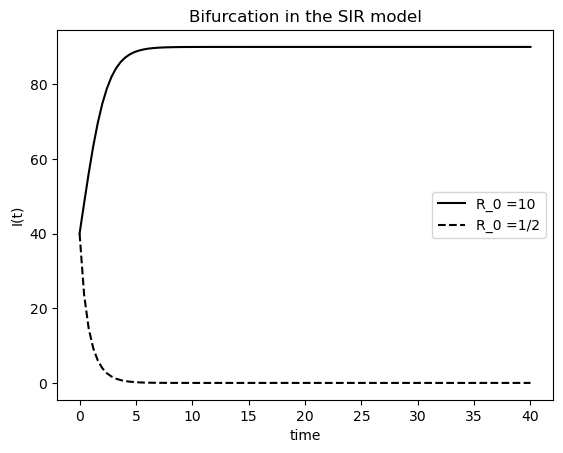

In [12]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
I_0 = 40
t = np.linspace(0, 40, 100)

mu =0.1
beta =1.0
alpha =beta-mu
I_star =(1-mu/beta)*N
I_1 =I_star/I_0-1

I_r_greater =I_star/(1+I_1*np.exp(-alpha*t))
mu =2.0
beta =1.0
alpha =beta-mu
I_star =(1-mu/beta)*N
I_1 =I_star/I_0-1
I_r_less =I_star/(1+I_1*np.exp(-alpha*t))

plt.plot(t,I_r_greater, c= 'k', label= 'R_0 =10')
plt.plot(t,I_r_less, c= 'k', linestyle='dashed', label= 'R_0 =1/2')
plt.ylabel('I(t)')
plt.xlabel('time')
plt.title('Bifurcation in the SIR model')
plt.legend()
plt.show()

## 12.5 The phase portrait, revisited

### Example 12.6: A competition model

In [13]:
from sympy import symbols,solve
x, y=symbols('x,y')
f =x*(2-x-2*y)
g =3*y*(2-2*x-y)
print('-'*28,'CODE OUTPUT','-'*29,'\n')
solve((f,g),(x,y))

---------------------------- CODE OUTPUT ----------------------------- 



[(0, 0), (0, 2), (2/3, 2/3), (2, 0)]

In [14]:
# Thisisacontinuationofthepreviouscode
from sympy import Matrix,diff
x0, y0=[0,0]
x1, y1=[0,2]
x2, y2=[2,0]
x3, y3=[2/3,2/3]
def JacEval(f,g,x_p,y_p):
    A =Matrix([[diff(f,x),diff(f,y)],[diff(g,x),diff(g,y)]])\
    .subs([(x,x_p),(y,y_p)])
    return list(A.eigenvals().keys())

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('The eigenvaluesof(0,0)are: ', JacEval(f,g,x0,y0))
print('The eigenvaluesof(0,2)are: ', JacEval(f,g,x1,y1))
print('The eigenvaluesof(2,0)are: ', JacEval(f,g,x2,y2))
print('The eigenvaluesof(2/3,2/3)are: ', JacEval(f,g,x3,y3))

---------------------------- CODE OUTPUT ----------------------------- 

The eigenvaluesof(0,0)are:  [2, 6]
The eigenvaluesof(0,2)are:  [-2, -6]
The eigenvaluesof(2,0)are:  [-6, -2]
The eigenvaluesof(2/3,2/3)are:  [1.07036751697599, -3.73703418364266]


In [17]:
import numpy as np
J =np.array([[-2/3,-4/3],[-4,-2]])
w, v=np.linalg.eig(J)
print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('The eigenvalues of x_3 are: ', w)
print('The eigenvectors of x_3 are: ', np.transpose(v))

---------------------------- CODE OUTPUT ----------------------------- 

The eigenvalues of x_3 are:  [ 1.07036752 -3.73703418]
The eigenvectors of x_3 are:  [[ 0.60889368 -0.79325185]
 [ 0.3983218   0.91724574]]


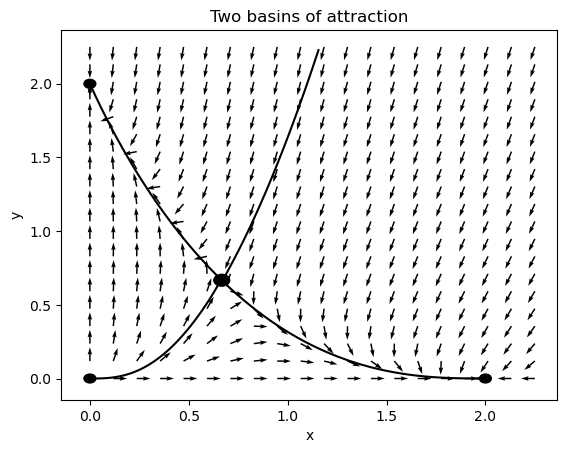

In [18]:
# Thisisacontinuationofthepreviouscode
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
np.seterr(invalid='ignore');
def sys(vec,t):
    x, y=vec
    return [x*(2-x-2*y),3*y*(2-2*x-y)]
#define times for integation
t_forward =np.linspace(0,100,1000)
t_backward_1 =np.linspace(0,-3,100)
t_backward_2 =np.linspace(0,-0.96,100)
#define initial conditions near saddle point
vec0 =[x3+0.01,y3-0.01]
vec1 =[x3-0.01,y3+0.01]
vec2 =[x3-0.01,y3-0.01]
vec3 =[x3+0.01,y3+0.01]
#compute the stable and unstable manifolds
unstable_1 = odeint(sys,vec0,t_forward)
unstable_2 = odeint(sys,vec1,t_forward)
stable_1 = odeint(sys,vec2,t_backward_1)
stable_2 = odeint(sys,vec3,t_backward_2)
#create a normalized vector field
x_v, y_v = np.meshgrid(np.linspace(0,2.25,20),np.linspace(0,2.25,20))
f_vec =x_v*(2-x_v-2*y_v)
g_vec =3*y_v*(2-2*x_v-y_v)
r =(f_vec**2+g_vec**2)**(0.5)  # normalizes vectors

#create plot of phase portrait
fp0 =plt.Circle((x0,y0),0.03,color='k')
fp1 =plt.Circle((x1,y1),0.03,color='k')
fp2 =plt.Circle((x2,y2),0.03,color='k')
fp3 =plt.Circle((x3,y3),0.04,color='k')
fig, ax=plt.subplots()
ax.plot(unstable_1[:,0],unstable_1[:,1], 'k')
ax.plot(unstable_2[:,0],unstable_2[:,1], 'k')
ax.plot(stable_1[:,0],stable_1[:,1], 'k')
ax.plot(stable_2[:,0],stable_2[:,1], 'k')
ax.quiver(x_v,y_v,f_vec/r, g_vec/r)
ax.add_patch(fp0)
ax.add_patch(fp1)
ax.add_patch(fp2)
ax.add_patch(fp3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Two basins of attraction')
plt.show()

### Example 12.7: The double-well potential

In [19]:
from sympy import Matrix, diff, symbols

x, y = symbols('x, y')

f, g = y, x-x**3

x0, y0=[0,0]
x1, y1=[1,0]
x2, y2=[-1,0]
def JacEval(f,g,x_p,y_p):
    A =Matrix([[diff(f,x),diff(f,y)],[diff(g,x),diff(g,y)]])\
        .subs([(x,x_p),(y,y_p)])
    return list(A.eigenvals().keys())

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('The eigenvaluesof(0,0)are: ', JacEval(f,g,x0,y0))
print('The eigenvaluesof(1,0)are: ', JacEval(f,g,x1,y1))
print('The eigenvaluesof(0,-1)are: ', JacEval(f,g,x2,y2))

---------------------------- CODE OUTPUT ----------------------------- 

The eigenvaluesof(0,0)are:  [-1, 1]
The eigenvaluesof(1,0)are:  [-sqrt(2)*I, sqrt(2)*I]
The eigenvaluesof(0,-1)are:  [-sqrt(2)*I, sqrt(2)*I]


In [20]:
# Thisisacontinuationofthepreviouscode
import numpy as np
J =np.array([[0,1],[1,0]])
w, v=np.linalg.eig(J)
print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('The eigenvaluesofx_0are: ', w)
print('The eigenvectorsofx_0are: ', np.transpose(v))

---------------------------- CODE OUTPUT ----------------------------- 

The eigenvaluesofx_0are:  [ 1. -1.]
The eigenvectorsofx_0are:  [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


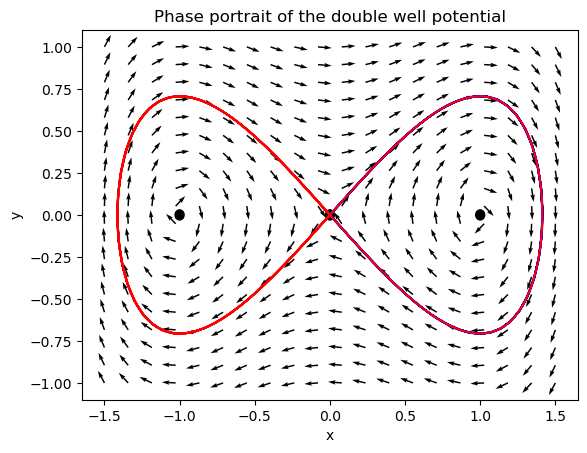

In [29]:
# Thisisacontinuationofthepreviouscode
from scipy.integrate import odeint
import matplotlib.pyplot as plt
np.seterr(invalid='ignore');
import warnings
warnings.filterwarnings("ignore")
def sys(vec,t):
    x, y=vec
    return [y,x-x**3]
t_forward =np.linspace(0,100,1000)
vec0 =[x0+0.01,y0+0.01]
vec1 =[x0-0.01,y0-0.01]
unstable_1 =odeint(sys,vec0,t_forward)
unstable_2 =odeint(sys,vec1,t_forward)

x_v, y_v=np.meshgrid(np.linspace(-1.5,1.5,20),np.linspace(-1,1,20))
# Analysis ofNonlinearSystems 417
f_vec =y_v
g_vec =x_v-x_v**3
r =(f_vec**2+g_vec**2)**(0.5)#normalizesvectors
fp0 =plt.Circle((x0,y0),0.03,color='k')
fp1 =plt.Circle((x1,y1),0.03,color='k')
fp2 =plt.Circle((x2,y2),0.03,color='k')
fig, ax=plt.subplots()
ax.plot(unstable_1[:,0],unstable_1[:,1], 'b')
ax.plot(unstable_2[:,0],unstable_2[:,1], 'r')
ax.quiver(x_v,y_v,f_vec/r, g_vec/r)
ax.add_patch(fp0)
ax.add_patch(fp1)
ax.add_patch(fp2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase portrait of the double well potential')
plt.show()

## 12.6 Nonlinear oscillations and limit cycles

### Example 12.8: The duffling equation

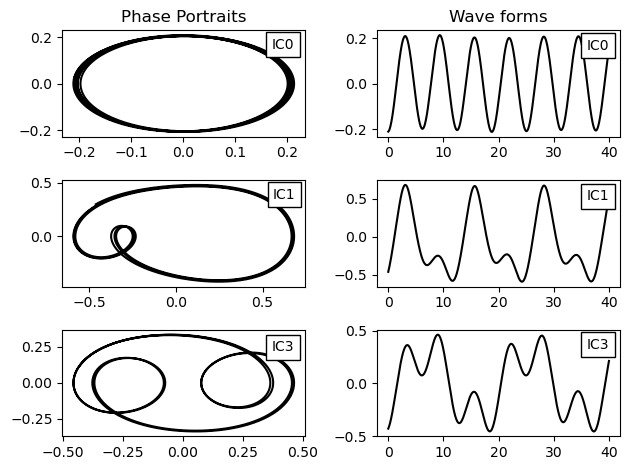

In [32]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
beta, omega,delta,B,alpha=0,1.0,0.08,0.2,1.0
def sys(vec,t):
    x, y=vec
    return [y,-delta*y-beta*x-alpha*x**3+B*np.cos(omega*t)]
t_forward =np.linspace(0,40,1000)
vec0 =[-0.21,0.02]
vec1 =[-0.46,0.3]
vec2 =[-0.43,0.12]
ic0 =odeint(sys,vec0,t_forward)
ic1 =odeint(sys,vec1,t_forward)
ic2 =odeint(sys,vec2,t_forward)

fig, ax=plt.subplots(3,2)
ax[0,0].plot(ic0[:,0],ic0[:,1], 'k')
ax[0,0].set_title('Phase Portraits')
ax[0,0].text(0.17,0.15, 'IC0',bbox={'facecolor':'white'})
ax[0,1].plot(t_forward,ic0[:,0], 'k')
ax[0,1].text(36,0.15, 'IC0',bbox={'facecolor':'white'})
ax[0,1].set_title('Wave forms')
ax[1,0].plot(ic1[:,0],ic1[:,1], 'k')
ax[1,0].text(0.56,0.35, 'IC1',bbox={'facecolor':'white'})
ax[1,1].plot(t_forward,ic1[:,0], 'k')
ax[1,1].text(36,0.48, 'IC1',bbox={'facecolor':'white'})
ax[2,0].plot(ic2[:,0],ic2[:,1], 'k')
ax[2,0].text(0.37,0.22, 'IC3',bbox={'facecolor':'white'})
ax[2,1].plot(t_forward,ic2[:,0], 'k')
ax[2,1].text(36,0.33, 'IC3',bbox={'facecolor':'white'})
fig.tight_layout()
plt.show()

## 12.7 Chaos

The loss of predictability is due to nonlinearities in the ODE describing the system, not randomness.

### 12.7.1 The Lorenz equations

### Example 12.9: The phase portrait of the Lorenz equations

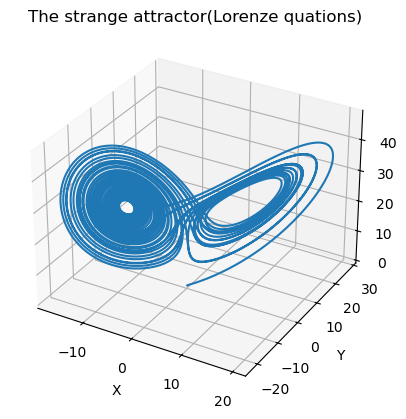

In [34]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
sigma, r,b=10,28,8/3
def sys(vec,t):
    x, y,z=vec
    return [sigma*(y-x),r*x-y-x*z,x*y-b*z]
t =np.linspace(0,40,10000)
vec0 =[0.1,0,0.1]
soln = odeint(sys,vec0,t)
xs,ys,zs =soln.T

fig =plt.figure()
ax =plt.axes(projection='3d')
ax.plot(xs, ys,zs)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title('The strange attractor(Lorenze quations)')
plt.show()

### Example 12.10: Trajectories on the butterfly attractor

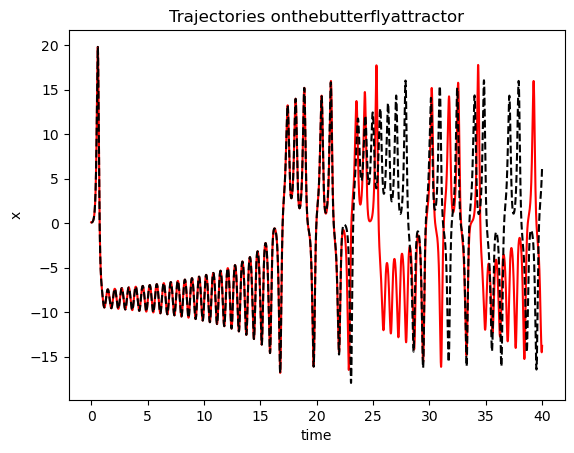

In [38]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

sigma, r,b=10,28,8/3
def sys(vec,t):
    x, y,z=vec
    return [sigma*(y-x),r*x-y-x*z,x*y-b*z]
t =np.linspace(0,40,10000)
vec0 =[0.1,0,0.1]
vec1 =[0.101,0,0.1]
soln0 =odeint(sys,vec0,t)
soln1 =odeint(sys,vec1,t)
x0 =soln0[:,0]
x1 =soln1[:,0]
plt.plot(t,x0, 'r')
plt.plot(t,x1,color='black', linestyle='dashed')
plt.ylabel('x')
plt.xlabel('time')
plt.title('Trajectories onthebutterflyattractor')
plt.show()

### 12.7.2 Sensitivity to inital conditions

Sensitivity to initial conditions limits the predictability of the system. The Lorenz equations have no random element, the nonlinearities are responsible for the breakdown

### 12.7.3 Lyapunov exponents and the horizon time

Formally, sensitivity to initial conditions means that initially close trajectories on the strange attractor diverge exponentially in time.

The maximum Lyapunov exponent is typically difficult to calculate from a system, however, there are methods of finding $\lambda$ from measured data called `time series`.

The Lyapunov exponent can provide an estimate for the horizon time $t_h$.

### Example 12.11: The horizon time

In [39]:
import numpy as np
def horizon_time(x):    # x = precision(initial error)
    a = 0.01    # error tolerance
    lam = 1.5   # maximal Lyapunov exponent
    t_h = np.log(a/x)/lam
    return t_h

t_h1 = horizon_time(10**(-3))
t_h2 = horizon_time(10**(-9))

print('When delta0 = 10^(-3), t_h = ', t_h1)
print('When delta0 = 10^(-9), t_h = ', t_h2)

When delta0 = 10^(-3), t_h =  1.5350567286626973
When delta0 = 10^(-9), t_h =  10.74539710063888


## 12.8 How to analyze a nonlinear system

In this chapter, we have seen that while we cannot necessarily solve nonlineaer differential equations, we can obtain a lot of information about their dynamics by drawing their phase portrain.

While it is impossible to provide a comprehensive overview of nonlinear systems, what has been covered in this chapter shuold provide you with a start when you need to analyze a nonlinear system of your own.
1. Find the fixed points of the system.
2. Classify the fixed points by computing the Jacobian matrix, evaluating it at each fixed point, and calculating its eigenvalues and eigenvectors.
3. By examining the formulas for the fixed points and eigenvalues, identify any possible bifurcations in the systems. Bifurcations can occur when fixed points collide or eigenvalues when eigenvalues change sign. Be on the look out for when eigenvalues become real or complex.
4. Using the eigenvalues of the Jacobian matrix, plot the stable and unstable manifolds of each saddle.
5. Plot a vector field plot as necessary, to fill in the phase portrait.
6. Plot the trajectories near any stable limit cycles.
7. In the case of a chaotic system, one trajectory in the phase space may be enough. To visualize the strange attractor, plot one tracjectory that settles on to it.